In [40]:
import numpy as np
import pandas as pd
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm

SyntaxError: invalid syntax (3102592458.py, line 4)

In [7]:
data_dir = 'C:\\Users\\oem\\Desktop\\isa_projekty\\jdszr12-databenders\\'

In [30]:
pokedata = pd.read_csv(data_dir + '\\pokemon.csv')
pokedata.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

<Axes: ylabel='Frequency'>

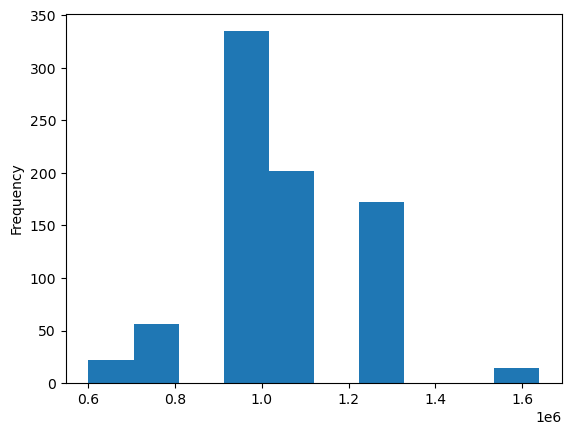

In [37]:
pokedata['experience_growth'].plot(kind='hist')